In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
def preprocess():
  data = pd.read_csv('./dataset/dry_bean_dataset.csv')
  data['MinorAxisLength'].interpolate(method='linear', inplace=True)
  df = pd.DataFrame(data)
  return df

def Plot(X, y, weights):
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # Plot the decision boundary
    x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    x2 = -(weights[0]*x1) / weights[1]
    plt.plot(x1, x2, color='red')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Decision Boundary')
    plt.show()


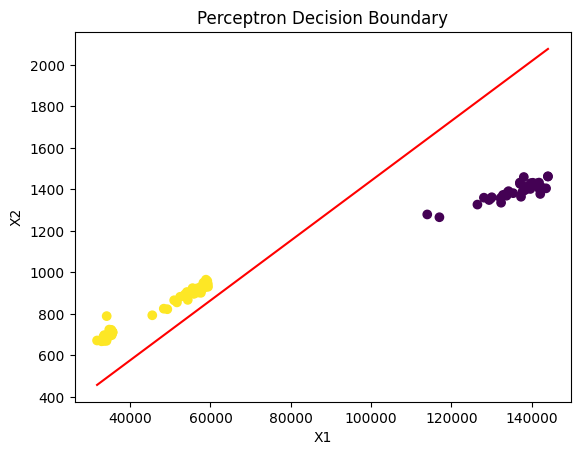

(array([[ -64.71288605, 4488.82003634]]), 1.0)

In [13]:
def single_perceptron(learning_rate, epochs, features, classes,bias=0):
    data = preprocess()
    X = data[features].values
    y = np.where(data['Class'] == classes[0], -1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    W = np.random.rand(1,2)
    for epoc in range(epochs):
        for x_i,t_i in zip(X_train,y_train):
            y_i = np.dot(W,x_i)+bias
            if y_i < 0 :
                y_i = -1
            else:
                y_i = 1
            if y_i != t_i:
                L = (t_i - y_i)
                W = W +learning_rate*(L)*x_i

        # Calculate accuracy on the test dataset
    correct_predictions = 0
    for x_i, t_i in zip(X_test, y_test):
        y_i = np.dot(W, x_i) + bias
        if y_i < 0:
            y_i = -1
        else:
            y_i = 1
        if y_i == t_i:
            correct_predictions += 1

    accuracy = correct_predictions / len(y_test)   
    Plot(X_train, y_train, W[0])         
    return W,accuracy
                
single_perceptron(0.01,100,['Area','Perimeter'],['BOMBAY','SIRA'],0)

In [7]:
def adaline_algorithm(features, classes, learning_rate, max_epochs, bias=False, mse_threshold=0.01):
    # Prepare the data
    data=preprocess()
    
    X = data[features].values
    y = np.where(data['Class'] == classes[0], 0, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    # Initialize weights and bias    
    weights = np.random.rand(X.shape[1])    
    bias_value = np.random.rand() if bias else 0
    for epoch in range(max_epochs):
        errors = 0
        total_squared_error = 0

        for xi, target in zip(X_train, y_train):
            # Calculate the predicted output
            output = np.dot(weights, xi) + bias_value
            output = np.where(output >= 0 , -1 ,1)
            # Calculate the error (e = ti - yi)
            error = target - output

            # Update weights and bias
            weights += learning_rate * error * xi
            bias_value += learning_rate * error if bias else 0

            # Update the total squared error
            total_squared_error += error ** 2

        # Calculate the mean squared error
        mse = total_squared_error / len(X_train)

        if mse <= mse_threshold:
            print(f"Converged after {epoch + 1} epochs.")
            break
    correct_predictions = 0
    for x_i, t_i in zip(X_test, y_test):
        y_i = np.dot(weights, x_i) + bias
        if y_i < 0:
            y_i = -1
        else:
            y_i = 1
        if y_i == t_i:
            correct_predictions += 1

    accuracy = correct_predictions / len(y_test)  
    print(accuracy)
    return weights, bias_value
adaline_algorithm(['Area','Perimeter'],['BOMBAY,SIRA'],0.01,100,False) 

1.0


(array([16679840.39039307,   221937.58774051]), 0)